# Hacking the computational microscope
# Autor: Emilio Paredes Solis 
## BSc. Ingeniería Electróónica 



In [ ]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [ ]:
from __future__ import print_function
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import nglview as nv


_ColormakerRegistry()

**texto en negrita**### Vizualization
##### This section is for view trajectory from drug-protein complex using amber package](https://)

In [ ]:
##; load data
psf="complex.parm7"
dcd="md.nc"
trj=mda.Universe(psf,dcd)
view=nv.show_mdanalysis(trj)
view

NGLWidget(max_frame=99)

In [ ]:
view.clear()
view.add_cartoon('protein', color_scheme='residueindex')
#view.add_ball_and_stick('not protein')
view.add_ball_and_stick('TYL')

### MD structural analysis
##### This secction talk about as we ca make structural analys for view conformational changes

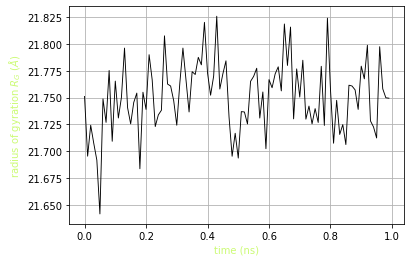

In [ ]:
ryg=[]

##; loop for ger ryg 
protein=trj.select_atoms("protein")
#print(trj.trajectory.n_frames)

for frames in trj.trajectory: 
    ryg.append((int(frames.frame)/100, protein.radius_of_gyration()))

Ryg= np.array(ryg)

##; Plotting 
ax= plt.subplot(111)
ax.plot(Ryg[:,0], Ryg[:,1], color="black", lw=0.9, label=r"$R_G$")
ax.set_xlabel("time (ns)", color="#ccfb76")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)", color="#ccfb76")
ax.grid()
ax.figure.savefig("Rygr.png")
plt.draw()

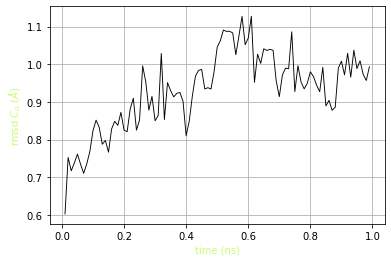

In [ ]:
import MDAnalysis.analysis.rms
rmsd_data=[] 
bb = trj.select_atoms('protein and name CA')                  # a selection (AtomGroup)
trj.trajectory[0]                                            # choose the first frame
frame_0 = bb.positions                                      # coordinates of first frame
for i in range(1,trj.trajectory.n_frames):               # loop over trajectories
    trj.trajectory[i]                                    # forward to the next frame
    frame_i = bb.positions                              #coordinates of the current frame
    rmsd = mda.analysis.rms.rmsd(frame_0, frame_i)           # get the radius of gyration
    rmsd_data.append((int(i*10)/1000,rmsd))

Rmsd= np.array(rmsd_data)

##; Plotting 
ax= plt.subplot(111)
ax.plot(Rmsd[:,0], Rmsd[:,1], color="black", lw=0.9, label=r"$R_G$")
ax.set_xlabel("time (ns)", color="#ccfb76")
ax.set_ylabel(r"rmsd $C_{\alpha}$ ($\AA$)", color="#ccfb76")
ax.grid()
ax.figure.savefig("RMSD.png")
plt.draw()


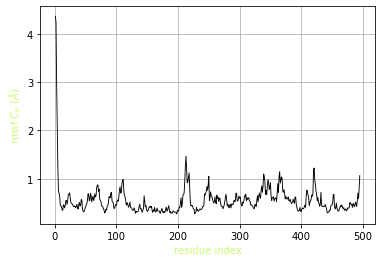

In [ ]:
##; RMSF analysis 
from MDAnalysis.analysis.rms import RMSF
import matplotlib.pyplot as plt 
calphas = protein.select_atoms("protein and name CA")
rmsfer = RMSF(calphas).run()
ax= plt.subplot(111)
ax.plot(calphas.resnums, rmsfer.rmsf, color="black", lw=0.9, label=r"$R_G$")
ax.set_xlabel("residue index", color="#ccfb76")
ax.set_ylabel(r"rmsf $C_{\alpha}$ ($\AA$)", color="#ccfb76")
ax.grid()
ax.figure.savefig("RMSF.png")
plt.draw()

In [ ]:
##; PCA Analysis 
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.analysis import pca, align

##; Alignment of structures 
aligner=align.AlignTraj(trj, trj, select='backbone',
                       in_memory=True).run() 
##; Essential dynamics 
pc=pca.PCA(trj, select='backbone',
          align=False, mean=None,
          n_components=None).run()
## Check-in pca components 
backbone = trj.select_atoms('backbone')
n_bb = len(backbone)
print('There are {} backbone atoms in the analysis'.format(n_bb))
print(pc.p_components.shape)


There are 1980 backbone atoms in the analysis
(5940, 5940)


In [ ]:
transformed = pc.transform(backbone, n_components=5)
pc1 = pc.p_components[:, 0]
trans1 = transformed[:, 0]
projected = np.outer(trans1, pc1) + pc.mean
coordinates = projected.reshape(len(trans1), -1, 3)
proj1=mda.Merge(backbone)
proj1.load_new(coordinates, order='fac') 
view = nv.show_mdanalysis(proj1.atoms)
view

NGLWidget(max_frame=99)

In [ ]:
from nglview.contrib.movie import MovieMaker
movie = MovieMaker(view, output='pc1.gif', in_memory=True)
movie.make()

IntProgress(value=0, description='Rendering ...', max=99)